In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

In [2]:
df=sns.load_dataset('iris')

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [5]:
#making Binary Classification

df=df[df['species']!='versicolor']

In [6]:
df['species']=df['species'].map({'virginica':0,'setosa':1})

In [7]:
X=df.drop('species',axis=1)
y=df['species']

In [8]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species           int64
dtype: object

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
log_reg=LogisticRegression()

In [11]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [12]:
parameter={'penalty':['l1', 'l2', 'elasticnet', None],'C':[i for i in range(0,15)],'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}

In [13]:
model=GridSearchCV(log_reg,param_grid=parameter,cv=5,scoring='accuracy',verbose=1)

In [14]:
model.fit(X_train,y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                               14],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy', verbose=1)

In [15]:
model.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

In [16]:
model.best_score_

1.0

In [17]:
model.best_estimator_

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [18]:
model.best_index_

25

In [19]:
model.cv_results_

{'mean_fit_time': array([0.00035462, 0.00029869, 0.00029998, 0.00033422, 0.00029836,
        0.00031586, 0.00034518, 0.00030804, 0.00031428, 0.00035009,
        0.00030227, 0.00029373, 0.00029278, 0.00032511, 0.00033369,
        0.00032039, 0.00029788, 0.00029588, 0.00032992, 0.00031052,
        0.00030279, 0.00029812, 0.00029702, 0.00029645, 0.00046134,
        0.00153632, 0.00050774, 0.0004415 , 0.00043416, 0.00221682,
        0.00388298, 0.00149565, 0.00454817, 0.00285363, 0.00266271,
        0.00235419, 0.00085359, 0.0008348 , 0.00073133, 0.00091844,
        0.00068736, 0.00166903, 0.00382547, 0.00144787, 0.00484328,
        0.00313482, 0.00204225, 0.00214071, 0.00050502, 0.00149589,
        0.00052357, 0.00045438, 0.00043306, 0.00219588, 0.00395646,
        0.00134687, 0.0048111 , 0.00287352, 0.00202518, 0.00206361,
        0.00048876, 0.00043211, 0.00043225, 0.00047708, 0.0004458 ,
        0.00135484, 0.00349965, 0.00128598, 0.00463591, 0.00298386,
        0.00195155, 0.00211782,

In [20]:
pred=model.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,precision_recall_curve,fbeta_score

print(f'accuracy of the model with prediction is {accuracy_score(y_test,pred)}')

print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

accuracy of the model with prediction is 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

[[12  0]
 [ 0  8]]


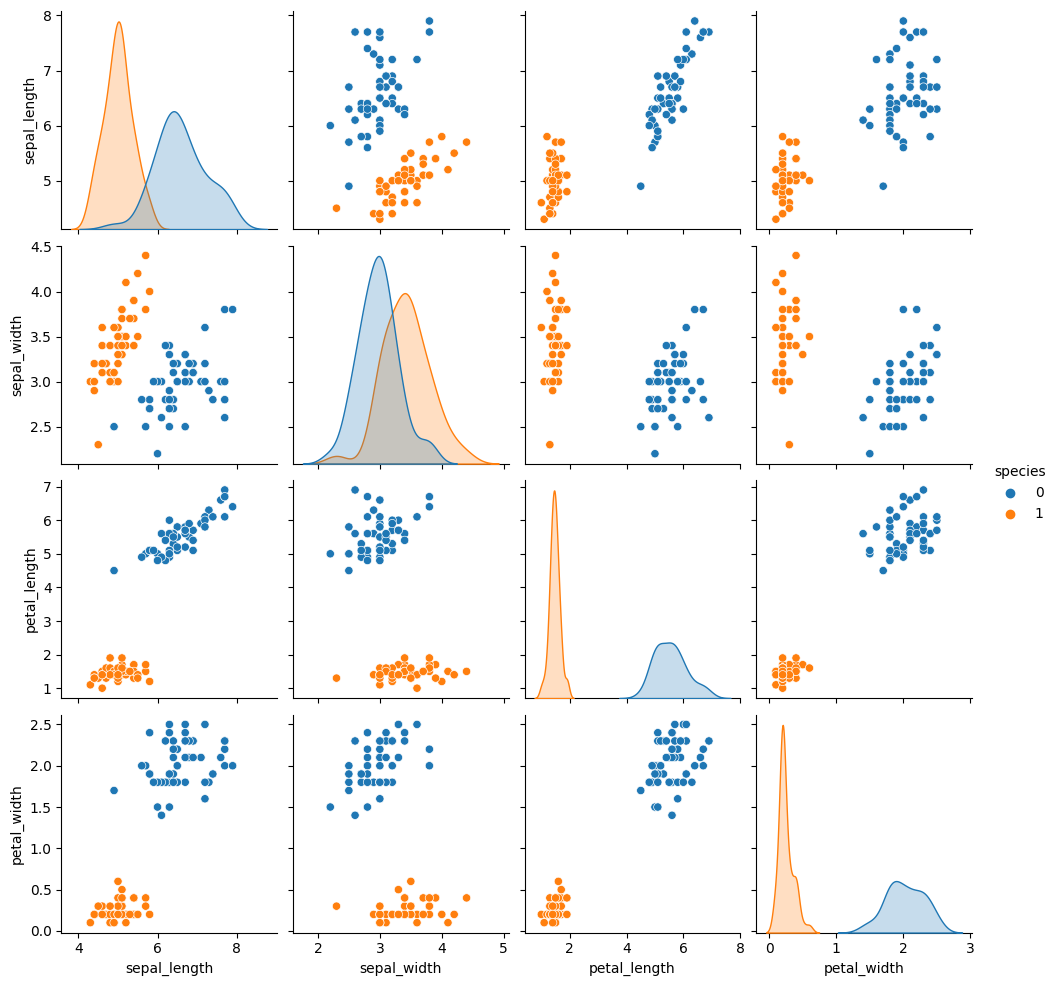

In [22]:
sns.pairplot(df,hue='species')